c:\Users\Thoma\OneDrive\Documents\2021_ORNL\paper_code\figures
c:\Users\Thoma\OneDrive\Documents\2021_ORNL\paper_code\data


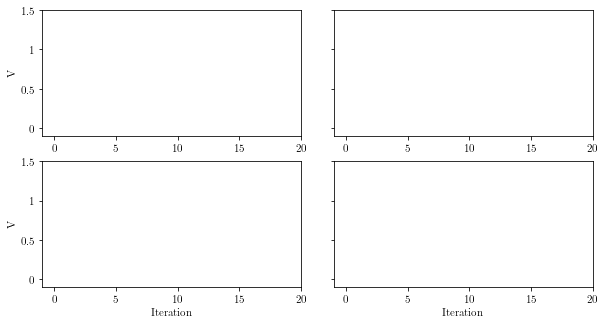

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import savez
from scipy.optimize import curve_fit

#Purpose:
#Create a Plot to visualize the convergence of the DMFT loop for different values of U

manila = {1: {'folderName': None}, 2: {'folderName':'U2_manila'}, 3:{'folderName': 'U3_manila'}, 4:{'folderName':'U4_manila'}, 5: {'folderName':'U5_manila'}, 5.5: {'folderName':None}, 6.5: {'folderName':'U65_manila'}, 7: {'folderName':'U7_manila'}, 8: {'folderName':'U8_manila'}}
qasm = {1: {'folderName':None}, 2: {'folderName':'U2_qasm'}, 3:{'folderName':'U3_qasm'}, 4:{'folderName':'U4_qasm'}, 5: {'folderName':'U5_qasm'}, 5.5: {'folderName':None}, 6.5:{'folderName': 'U65_qasm_truncated'}, 7: {'folderName':'U7_qasm'}, 8:{'folderName': 'U8_qasm'}}

#Create a Dictionary of the results files
print(os.getcwd())
os.chdir('../data')
print(os.getcwd())
for contents in manila.values():
    if contents['folderName'] is None:
        continue
    else:
        os.chdir(contents['folderName'])
        for file in os.listdir():
            if file.endswith('.npz'):
                contents['V_List'] = np.load(file)['V_list']
                #print(np.load(file).files)
                contents['U'] = np.load(file)['Uval']
                #print(np.load(file)['Uval'])
        os.chdir('../')

for contents in qasm.values():
    if contents['folderName'] is None:
        continue
    else:
        os.chdir(contents['folderName'])
        for file in os.listdir():
            if file.endswith('.npz'):
                contents['V_List'] = np.load(file)['V_list']
                #print(np.load(file).files)
                contents['U'] = np.load(file)['Uval']
                #print(np.load(file)['Uval'])
        os.chdir('../')
os.chdir('../')
#print(os.getcwd())

def ExactIterations(V_initial, Uval):
    v_list = [V_initial]
    for i in range(30):
        omega1 = 0.25*(np.sqrt(Uval**2 + 64*v_list[-1]**2) - np.sqrt(Uval**2 + 16*v_list[-1]**2))
        omega2 = 0.25*(np.sqrt(Uval**2 + 64*v_list[-1]**2) + np.sqrt(Uval**2 + 16*v_list[-1]**2))
        Z_expected = (omega1**2)*(omega2**2)/(v_list[-1]**2*(omega1**2 + omega2**2 - v_list[-1]**2))
        v_list.append(np.sqrt(Z_expected))
    return v_list

def actualV(U):
    U = np.minimum(U,6)
    return (np.sqrt(36 - (U**2))/6)

def fitFunc(x,a,b,c,d):
    return a*np.exp(-b*x**d) + c
    
def getFitFunc(a,b,c,d):
    return lambda x: fitFunc(x,a,b,c,d)


from matplotlib import rc
rc('font',**{'family':'serif','serif':['CMU Serif']})
rc('text', usetex=True)
rc('font',**{'size':11,})
from matplotlib import figure
from matplotlib.gridspec import GridSpec
#Combining the Data for Z, U = 2, 4, 8

fig_6 = plt.figure()
"""ax_1 = fig_6.add_axes([0.1,0.1,0.40,0.40])
ax_2 = fig_6.add_axes([0.55,0.1,0.40,0.40])#, sharey=ax_1)
ax_3 = fig_6.add_axes([0.1,0.55,0.40,0.40], sharex=ax_1)#, sharey=ax_2)
ax_4 = fig_6.add_axes([0.55,0.55,0.40,0.40], sharex=ax_2)#, sharey=ax_2)"""
ax_1 = fig_6.add_axes([0.1,0.1,0.4,0.25])
ax_2 = fig_6.add_axes([0.55,0.1,0.4,0.25])#, sharey=ax_1)
ax_3 = fig_6.add_axes([0.1,0.4,0.4,0.25], sharex=ax_1)#, sharey=ax_2)
ax_4 = fig_6.add_axes([0.55,0.4,0.4,0.25], sharex=ax_2)#, sharey=ax_2)
ax_4.set_yticklabels([])
ax_2.set_yticklabels([])
ax_3.set_xticklabels([])
ax_4.set_xticklabels([])

"""ax_1.annotate('1', xy=(0.5, 0.5), xycoords='axes fraction')
ax_2.annotate('2', xy=(0.5, 0.5), xycoords='axes fraction')
ax_3.annotate('3', xy=(0.5, 0.5), xycoords='axes fraction')
ax_4.annotate('4', xy=(0.5, 0.5), xycoords='axes fraction')"""

ax_1.set_ylabel(r'V')
ax_3.set_ylabel(r'V')
axList = [ax_1, ax_2, ax_3, ax_4]
for ax in [ax_1, ax_3]:
    ax.set_yticks([0, 0.5, 1, 1.5])
    ax.set_yticklabels([0, 0.5, 1, 1.5])
for ax in axList:
    ax.set_ylim([-0.1,1.5])
    ax.set_xlim([-1,20])
for ax in [ax_1, ax_2]:
    ax.set_xticks([0,5,10,15,20])#,50])
    ax.set_xticklabels([0,5,10,15,20])

for ax in [ax_2, ax_4]:
    ax.set_yticks([0, 0.5, 1, 1.5])
    #ax.set_xticklabels([0,5,10,15,20])

ax_1.set_xlabel('Iteration')
ax_2.set_xlabel('Iteration')
#ax_u2.get_xaxis().set_visible(False)
#ax_u5.get_xaxis().set_visible(False)

fig_6.set_size_inches(9,7)

color2 = '#498AD8'#'#840F9C'
color1 = '#498AD8'#'k'#'#498AD8'
color3 = '#EC921B'

N = 20


0.0


C:\Users\Thoma\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Thoma\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


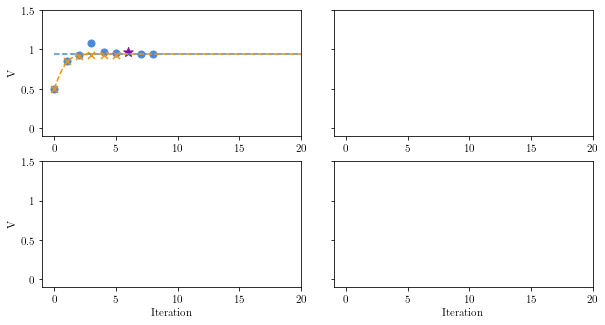

In [2]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 2

U4_V_list_qasm =  qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']

ax_3.hlines(actualV(U_number), 0, N, linestyles='dashed', label='Self-Consistency', color=color1)
print(actualV(6))
actualSteps = (ExactIterations(0.5, U_number))
#output = curve_fit(fitFunc, range(len(actualSteps)), actualSteps)
params = np.polyfit(range(len(actualSteps)), actualSteps, 100)

#fit_func = np.polynomial(params)
#fit_func = getFitFunc(*output[0])
params = np.polyfit(range(len(actualSteps)), actualSteps, 100)
smooth = np.linspace(0, N, 1000)
ax_3.plot(smooth, np.polyval(params, smooth), c=color3, linestyle='dashed')

#ax_3.plot(smooth, fit_func(smooth), c=color3, linestyle='dashed')


color4 = '#840F9C'

manilla_locations = [0, 1, 2, 3, 4, 5, 7, 8]
U4_V_list_manila_filtered = U4_V_list_manila[manilla_locations]
ax_3.scatter(manilla_locations, U4_V_list_manila_filtered, s =50,c=color2, label='ibmq\_manila')
ax_3.scatter(6, U4_V_list_manila[6], s =100,c=color4, marker='*')#, label='ibmq\_manila')
ax_3.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=50, label='Noiseless Simulator', marker='x', facecolors=color3)
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')


fig_6




C:\Users\Thoma\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


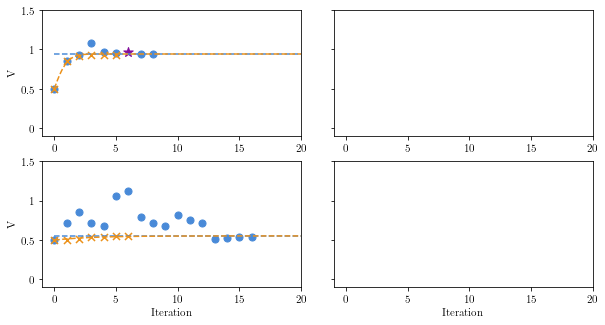

In [3]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 5

U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']
expected = actualV(U_number)
ax_1.hlines(expected, 0,N, linestyles='dashed', label='Self-Consistency', color=color1)

actualSteps = (ExactIterations(0.5, U_number))
params = np.polyfit(range(len(actualSteps)), actualSteps, 100)
smooth = np.linspace(0, N, 1000)
ax_1.plot(smooth, np.polyval(params, smooth), c=color3, linestyle='dashed')


ax_1.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =50,c=color2, label='ibmq\_manila')
ax_1.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=50, label='Noiseless Simulator', marker='x', facecolors=color3)
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')

fig_6




C:\Users\Thoma\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


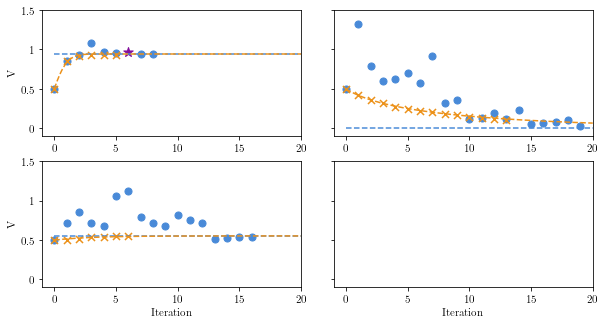

In [4]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 6.5

U4_V_list_qasm =  (qasm[U_number]['V_List'])
U4_V_list_manila = (manila[U_number]['V_List'])
ax_4.hlines((actualV(U_number)), 0, N, linestyles='dashed', label='Self-Consistency', color=color1)


actualSteps = (ExactIterations(0.5, U_number))
params = np.polyfit(range(len(actualSteps)), actualSteps, 100)
smooth = np.linspace(0, N, 1000)
ax_4.plot(smooth, np.polyval(params, smooth), c=color3, linestyle='dashed')

ax_4.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =50,c=color2, label='ibmq\_manila')
ax_4.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=50, label='Noiseless Simulator', marker='x', facecolors=color3)
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')
#ax_1.scatter(range(len(actualSteps)), actualSteps, s =10,c='k')#, label='ibmq\_manila')

fig_6




C:\Users\Thoma\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


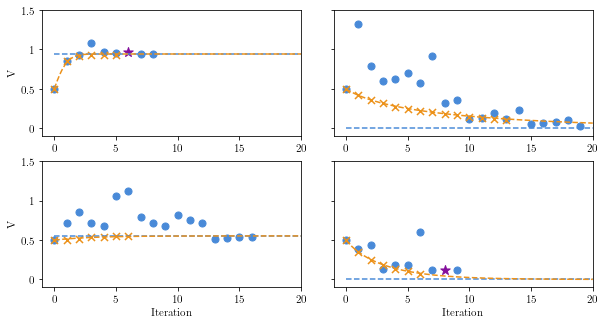

In [5]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 8

U4_V_list_qasm =  qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']

ax_2.hlines(actualV(U_number), 0,N, linestyles='dashed', label='Self-Consistency', color=color1)
actualSteps = (ExactIterations(0.5, U_number))
params = np.polyfit(range(len(actualSteps)), actualSteps, 100)
smooth = np.linspace(0, N, 1000)
ax_2.plot(smooth, np.polyval(params, smooth), c=color3, linestyle='dashed', label='Ideal Convergence')


manilla_locations = [0, 1, 2, 3, 4, 5, 6, 7, 9]
U4_V_list_manila_filtered = U4_V_list_manila[manilla_locations]
ax_2.scatter(manilla_locations, U4_V_list_manila_filtered, s =50,c=color2, label='ibmq\_manila')
ax_2.scatter(8, U4_V_list_manila[8], s =100,c=color4, marker='*')#, label='ibmq\_manila')
ax_2.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=50, label='Noiseless Simulator', marker='x', facecolors=color3)
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')

fig_6




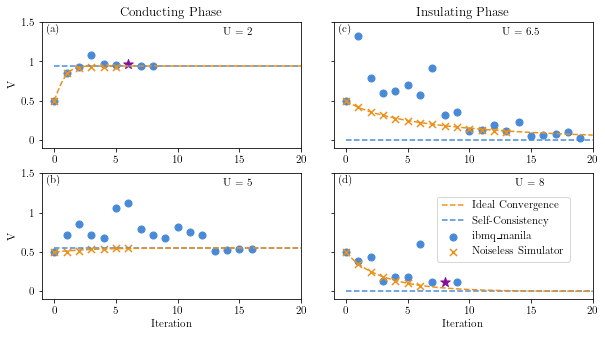

In [6]:
ax_4.annotate('U = {}'.format(6.5), xy=(0.65, 0.9), xycoords='axes fraction')
ax_2.annotate('U = {}'.format(8), xy=(0.7, 0.9), xycoords='axes fraction')
ax_3.annotate('U = {}'.format(2), xy=(0.7, 0.9), xycoords='axes fraction')
ax_1.annotate('U = {}'.format(5), xy=(0.7, 0.9), xycoords='axes fraction')

ax_3.annotate('(a)' , xy=(0.02, 0.92), xycoords='axes fraction')
ax_1.annotate('(b)' , xy=(0.02, 0.92), xycoords='axes fraction')
ax_4.annotate('(c)' , xy=(0.02, 0.92), xycoords='axes fraction')#, backgroundcolor='#FFFFFF55')#, bbox={facecolor='red', alpha=0.5})#, backgroundalpha=0.5)
ax_2.annotate('(d)' , xy=(0.02, 0.92), xycoords='axes fraction')
ax_3.set_title('Conducting Phase')
ax_4.set_title('Insulating Phase')
ax_2.legend(loc=(0.4,.3))
fig_6


In [9]:
print(os.getcwd())
fig_6.savefig('figures//Figure_5_final.pdf'.format(U_number), dpi=300)
fig_6.savefig('figures//Figure_5_final.png'.format(U_number), dpi=600)


c:\Users\Thoma\OneDrive\Documents\2021_ORNL\paper_code


In [ ]:
os.getcwd()


'c:\\Users\\Thoma\\OneDrive\\Documents\\2021_ORNL\\hubbard-model\\project_files\\final_DMFT'

In [ ]:
#os.chdir('../../deliverables/paper/')
#os.chdir('../../deliverables')